<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-dataframe" data-toc-modified-id="Prepare-dataframe-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare dataframe</a></span></li><li><span><a href="#Check-exist" data-toc-modified-id="Check-exist-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check exist</a></span></li><li><span><a href="#Build-hashing-function" data-toc-modified-id="Build-hashing-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Build hashing function</a></span></li><li><span><a href="#Count-image-frequency-or-how-many-an-image-duplicated" data-toc-modified-id="Count-image-frequency-or-how-many-an-image-duplicated-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Count image frequency or how many an image duplicated</a></span></li><li><span><a href="#Check-image-with-4x-duplication" data-toc-modified-id="Check-image-with-4x-duplication-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Check image with 4x duplication</a></span></li><li><span><a href="#Check-image-with-3x-duplication" data-toc-modified-id="Check-image-with-3x-duplication-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Check image with 3x duplication</a></span></li><li><span><a href="#Check-image-with-2x-duplication" data-toc-modified-id="Check-image-with-2x-duplication-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Check image with 2x duplication</a></span></li><li><span><a href="#Selection-duplicate-image" data-toc-modified-id="Selection-duplicate-image-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Selection duplicate image</a></span></li></ul></div>

# Check Image Duplicates Using Hashing

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import cv2
import os
import pandas as pd
from matplotlib import pyplot as plt

## Prepare dataframe

https://www.pyimagesearch.com/2017/11/27/image-hashing-opencv-python/

In [3]:
!dir "D:/Datasets/thesis_dr/aptos2019-blindness-detection/""

 Volume in drive D is Storage space
 Volume Serial Number is 3C35-EA61

 Directory of D:\Datasets\thesis_dr\aptos2019-blindness-detection

12/06/2020  07:47 AM    <DIR>          .
12/06/2020  07:47 AM    <DIR>          ..
03/20/2020  10:02 AM               124 desktop.ini
12/06/2020  07:47 AM         1,235,300 df_train_dhash.csv
12/06/2020  07:46 AM         1,235,300 df_train_duplicate.csv
11/20/2020  09:22 AM    <DIR>          models
12/18/2019  03:23 AM            28,938 sample_submission.csv
12/18/2019  03:23 AM            25,072 test.csv
10/10/2020  08:35 AM    <DIR>          test_images
12/18/2019  03:27 AM            54,948 train.csv
10/10/2020  08:35 AM    <DIR>          train_images
10/30/2020  07:20 PM    <DIR>          train_images_balance_mini
10/28/2020  11:42 PM    <DIR>          train_images_jpeg
11/05/2020  06:37 AM    <DIR>          train_images_rescaled_500
12/06/2020  06:29 AM    <DIR>          train_images_rescaled_500_crop
12/06/2020  06:29 AM    <DIR>          trai

In [4]:
base_dir = 'D:/Datasets/thesis_dr/aptos2019-blindness-detection/'
img_dir = 'D:/Datasets/thesis_dr/aptos2019-blindness-detection/train_images/'

In [5]:
df = pd.read_csv(base_dir + 'train.csv')
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [6]:
df['id_code'] = df['id_code'] + '.png'
df.tail()

,id_code,diagnosis
3657,ffa47f6a7bf4.png,2
3658,ffc04fed30e6.png,0
3659,ffcf7b45f213.png,2
3660,ffd97f8cd5aa.png,0
3661,ffec9a18a3ce.png,2


## Check exist

In [7]:
os.path.exists(os.path.join(img_dir, df.loc[0, ['id_code']].item()))

True

In [8]:
df['is_exist'] = ''

for idx in range(len(df['id_code'])):
    fpath = os.path.join(img_dir, df.loc[idx, ['id_code']].item())
    df.loc[idx, ['is_exist']] = os.path.exists(fpath)

df.head()

,id_code,diagnosis,is_exist
0,000c1434d8d7.png,2,True
1,001639a390f0.png,4,True
2,0024cdab0c1e.png,1,True
3,002c21358ce6.png,0,True
4,005b95c28852.png,0,True


In [9]:
df.loc[df['is_exist']==False]

,id_code,diagnosis,is_exist


## Build hashing function

In [10]:
def dhash(image, hashSize=32):
    # resize the input image, adding a single column (width) so we
    # can compute the horizontal gradient
    resized = cv2.resize(image, (hashSize + 1, hashSize))
    # compute the (relative) horizontal gradient between adjacent
    # column pixels
    diff = resized[:, 1:] > resized[:, :-1]
    # convert the difference image to a hash
    return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

In [11]:
# check the known duplicate image (from kaggle)
image = cv2.imread(
    'D:/Datasets/thesis_dr/aptos2019-blindness-detection/train_images/1632c4311fc9.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imageHash = dhash(image)
imageHash

46624888871291645581644297469193371638632347922301348992596333474238855901862535643332904467330107100143750854068968251217116490777804135763404480095545146740869563804145187941302975171926704504254284601441528763990094666058051200253513746232686312866179920764803318850911645396224326563640153247482368415264

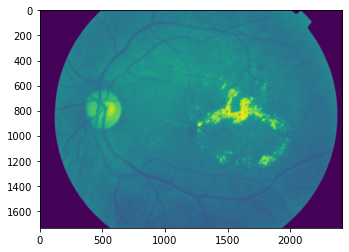

In [12]:
plt.imshow(image)

In [13]:
image = cv2.imread(
    'D:/Datasets/thesis_dr/aptos2019-blindness-detection/train_images/a75bab2463d4.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imageHash = dhash(image)
imageHash

46624888871291645581644297469193371638632347922301348992596333474238855901862535643332904467330107100143750854068968251217116490777804135763404480095545146740869563804145187941302975171926704504254284601441528763990094666058051200253513746232686312866179920764803318850911645396224326563640153247482368415264

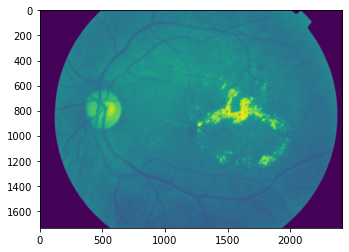

In [14]:
plt.imshow(image)

In [15]:
img = cv2.imread(os.path.join(img_dir, df.loc[0, ['id_code']].item()))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_dhash = dhash(img)
img_dhash

45055498466493578483618973572013413560773374308833955287537397088502346382496683961182567830024059489914247277416710289923974077071821693390949843212785864334306472988519528157895870382947064509768654443779166597850686470481105780148064403566518503545836207893897899253264954884737685223038558633855024271492

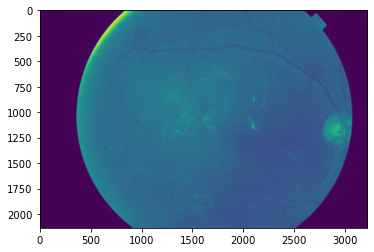

In [16]:
plt.imshow(img)

In [17]:
# apply to all dataset
df['dhash'] = ''
counter = 0
list_error = list()

for idx in range(len(df)):
    counter += 1
    if counter % 250 == 0:
        print('image processed: ', counter)

    try:
        fpath = os.path.join(img_dir, df.loc[idx, ['id_code']].item())
        img = cv2.imread(fpath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_dhash = dhash(img)
        df.loc[idx, ['dhash']] = img_dhash
    except:
        list_error.append(fpath)

image processed:  250
image processed:  500
image processed:  750
image processed:  1000
image processed:  1250
image processed:  1500
image processed:  1750
image processed:  2000
image processed:  2250
image processed:  2500
image processed:  2750
image processed:  3000
image processed:  3250
image processed:  3500


In [18]:
list_error

[]

In [19]:
df

,id_code,diagnosis,is_exist,dhash
0,000c1434d8d7.png,2,True,4505549846649357848361897357201341356077337430...
1,001639a390f0.png,4,True,2329637184878609198035515006640525134579216941...
2,0024cdab0c1e.png,1,True,2423240825355712633243422248054645083667877231...
3,002c21358ce6.png,0,True,6900833685078708622050523299339707984650415156...
4,005b95c28852.png,0,True,1596672251484725956711788094558338750112176232...
...,...,...,...,...
3657,ffa47f6a7bf4.png,2,True,1714415029888012417314661111083115996014360412...
3658,ffc04fed30e6.png,0,True,1596672252599988637907833311359172559898032526...
3659,ffcf7b45f213.png,2,True,2371174750225767638951270617106319090295289270...
3660,ffd97f8cd5aa.png,0,True,4495615386714830418073151623371454397778002504...


## Count image frequency or how many an image duplicated

https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column

In [20]:
df['freq'] = df.groupby('dhash')['dhash'].transform('count')
df

,id_code,diagnosis,is_exist,dhash,freq
0,000c1434d8d7.png,2,True,4505549846649357848361897357201341356077337430...,1
1,001639a390f0.png,4,True,2329637184878609198035515006640525134579216941...,1
2,0024cdab0c1e.png,1,True,2423240825355712633243422248054645083667877231...,1
3,002c21358ce6.png,0,True,6900833685078708622050523299339707984650415156...,1
4,005b95c28852.png,0,True,1596672251484725956711788094558338750112176232...,1
...,...,...,...,...,...
3657,ffa47f6a7bf4.png,2,True,1714415029888012417314661111083115996014360412...,1
3658,ffc04fed30e6.png,0,True,1596672252599988637907833311359172559898032526...,1
3659,ffcf7b45f213.png,2,True,2371174750225767638951270617106319090295289270...,1
3660,ffd97f8cd5aa.png,0,True,4495615386714830418073151623371454397778002504...,1


In [21]:
df['freq'].unique()

array([1, 2, 3, 4], dtype=int64)

## Check image with 4x duplication

https://matplotlib.org/3.1.1/tutorials/introductory/images.html

In [22]:
def plot_duplicate(df, set_data, n_dup):
    for idx_set in range(len(set_data)):
        fig = plt.figure(figsize=(5 * n_dup, 5 * len(set_data)))

        for idx in range(n_dup):
            f = df.loc[df['dhash'] == set_data[idx_set]]
            img_name = str(f.iloc[idx]['id_code'])
            label_name = str(f.iloc[idx]['diagnosis'])
            fpath = os.path.join(img_dir, img_name)
            img = cv2.imread(fpath)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            a = fig.add_subplot(len(set_data), n_dup, idx + 1)
            imgplot = plt.imshow(img)
            a.set_title(str(img_name + ' / ' + label_name))

In [23]:
df_duplicate4 = df.loc[df['freq'] == 4]
df_duplicate4

,id_code,diagnosis,is_exist,dhash,freq
1730,7a3ea1779b13.png,1,True,2172057777561727016728745938327422032153307929...,4
2407,a8582e346df0.png,1,True,2172057777561727016728745938327422032153307929...,4
2784,c027e5482e8c.png,1,True,2172057777561727016728745938327422032153307929...,4
2912,ca6842bfcbc9.png,1,True,2172057777561727016728745938327422032153307929...,4


ambil nilai unik dari dhash

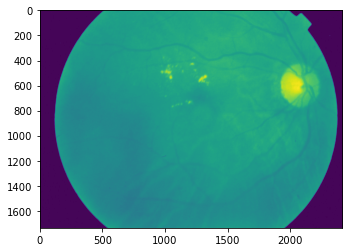

In [24]:
img = cv2.imread(os.path.join(img_dir, df_duplicate4.iloc[0]['id_code']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

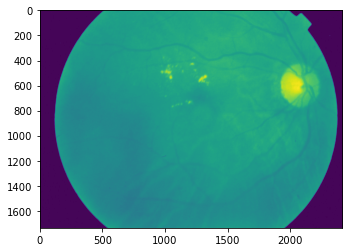

In [25]:
img = cv2.imread(os.path.join(img_dir, df_duplicate4.iloc[1]['id_code']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [26]:
set_duplicate4 = list(set(df_duplicate4['dhash']))
set_duplicate4

[2172057777561727016728745938327422032153307929381066453828114790576609055236563253518302513031385792478543964063382453677805853961153403051185700317631391771973975152444434524702966074294692890367639267362237666590509605920047898262393091201901831748548190202234053177473763808893770025671748159964171119200]

tes set_duplicate4 bisa dipakai

In [27]:
df_duplicate4.loc[df_duplicate4['dhash'] == set_duplicate4[0]]

,id_code,diagnosis,is_exist,dhash,freq
1730,7a3ea1779b13.png,1,True,2172057777561727016728745938327422032153307929...,4
2407,a8582e346df0.png,1,True,2172057777561727016728745938327422032153307929...,4
2784,c027e5482e8c.png,1,True,2172057777561727016728745938327422032153307929...,4
2912,ca6842bfcbc9.png,1,True,2172057777561727016728745938327422032153307929...,4


tes indexing pada set_duplicate4

In [28]:
f = df_duplicate4.loc[df_duplicate4['dhash'] == set_duplicate4[0]]
f

,id_code,diagnosis,is_exist,dhash,freq
1730,7a3ea1779b13.png,1,True,2172057777561727016728745938327422032153307929...,4
2407,a8582e346df0.png,1,True,2172057777561727016728745938327422032153307929...,4
2784,c027e5482e8c.png,1,True,2172057777561727016728745938327422032153307929...,4
2912,ca6842bfcbc9.png,1,True,2172057777561727016728745938327422032153307929...,4


In [29]:
f.iloc[0]['id_code']

'7a3ea1779b13.png'

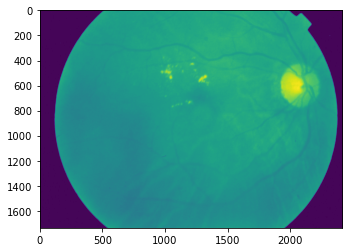

In [30]:
img = cv2.imread(os.path.join(img_dir, f.iloc[0]['id_code']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

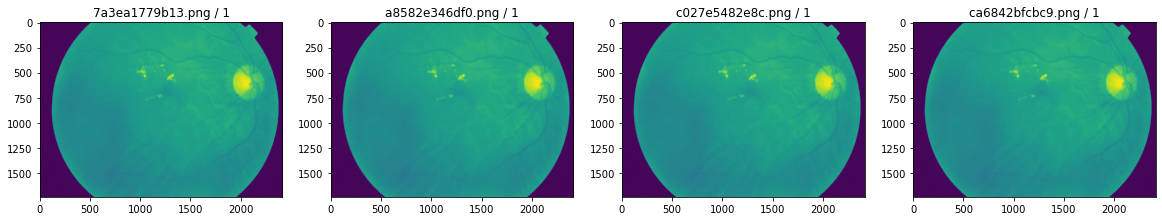

In [31]:
plot_duplicate(df_duplicate4, set_duplicate4, 4)

## Check image with 3x duplication

In [32]:
df_duplicate3 = df.loc[df['freq'] == 3]
df_duplicate3.head()

,id_code,diagnosis,is_exist,dhash,freq
431,1e8a1fdee5b9.png,1,True,2475787607378626658835805691391004593318386383...,3
920,42a850acd2ac.png,2,True,1168086357984782599978348579377059719052959852...,3
1135,4fecf87184e6.png,3,True,1247853630573136263458086393508257496036524868...,3
1156,51131b48f9d4.png,1,True,1168086357984782599978348579377059719052959852...,3
1381,60f15dd68d30.png,4,True,2551633009844111481471669657627722769662400867...,3


In [33]:
set_duplicate3 = list(set(df_duplicate3['dhash']))
set_duplicate3

[25516330098441114814716696576277227696624008675570479163671733357655357595274841221637945745465503144233251586807268744720671687703457972866838812033294597114698526650713399403575904435986816984459679825656911955095451879728748086159847148552859583362915762725657256116839162679515264314870714715807844434049,
 12478536305731362634580863935082574960365248688768053717589328046377534412826924617926380969801292091515474641951257752743848645875647056141659119012797287135777510389859150189600813003712189839532084834745024145623049555032489499697051800251542133854300618030775514679588815146514486920803841653585031185440,
 2475787607378626658835805691391004593318386383965488293695275832386594789496346249699316538128152567713147074840652162829325155218376940615927690341753902741865690292143267487351424054726207846421988095229896615414601853581938311498971463299638584668666838422288764867367666890103524414148816558460139815008,
 1168086357984782599978348579377059719052959852645836335169314948212

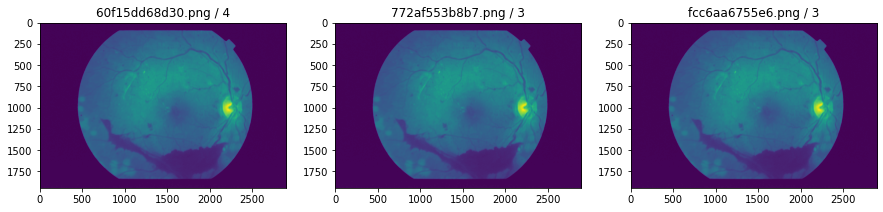

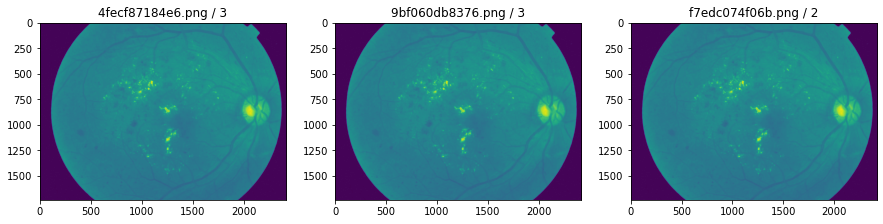

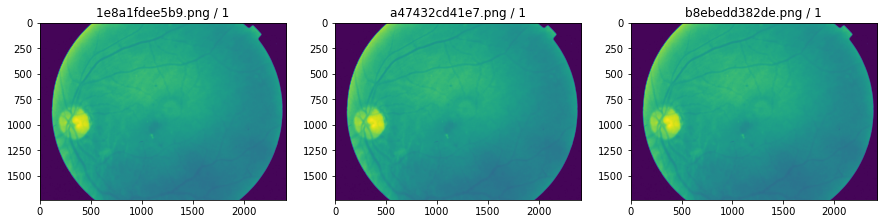

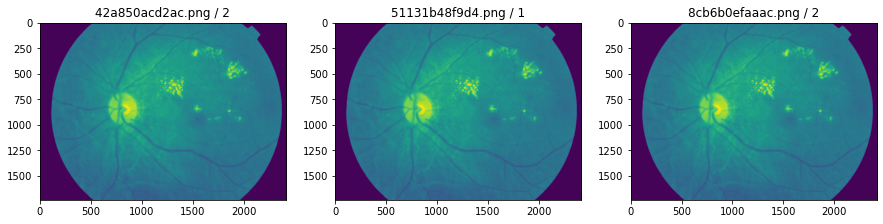

In [34]:
plot_duplicate(df_duplicate3, set_duplicate3, 3)

## Check image with 2x duplication

In [35]:
df_duplicate2 = df.loc[df['freq'] == 2]
df_duplicate2.head()

,id_code,diagnosis,is_exist,dhash,freq
9,00cb6555d108.png,1,True,1174912225486105570453156111664932870545041083...,2
16,012a242ac6ff.png,2,True,2652370885852067429265411185674275120098466405...,2
19,0161338f53cc.png,2,True,9561369784178977962442971613017420969371655211...,2
35,026dcd9af143.png,2,True,2380612597505309155622202886014080425425521543...,2
43,034cb07a550f.png,4,True,9636200136329036397516930976117891617921591573...,2


In [36]:
set_duplicate2 = list(set(df_duplicate2['dhash']))
set_duplicate2

[57929511455054431898729188386105051920684191426174043305494644454301262423728806091023017167457341717358637451595800500617426781644098663746890602482582540104832929155177262616467444048732928678318065574676597193730927458722084492785703426728544169864068394158117021407401837843525669130539850676605094103620,
 1174912225486105570453156111664932870545041083691933172521447994514835976605535793206884009973835763038679196173827286315456534491190756359474904725152458547746806051573009669296911938827910678424791362755013841312682602624463796948830206755221901991525306182390219852269444957876176606858649549663538716768,
 1081249982554530036999062006928394145080312247512672450639555877715903790801160863933496664586957763976511526885196389600960048315113025891961485572858263098188006810564770976620963506300791173600301821001087641706565421133325247913322137673095717392642064647420666578646490993028010310904669741865660696210,
 11917341902907673187164351463202251709953952379227288674602634174055

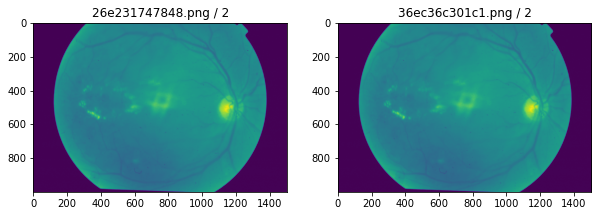

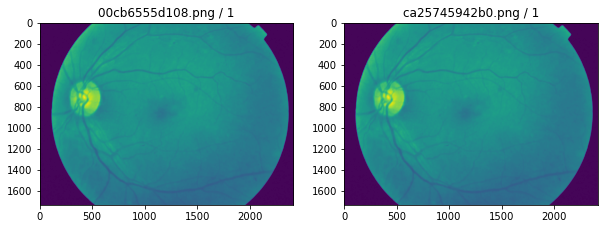

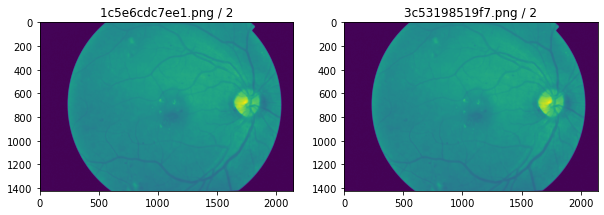

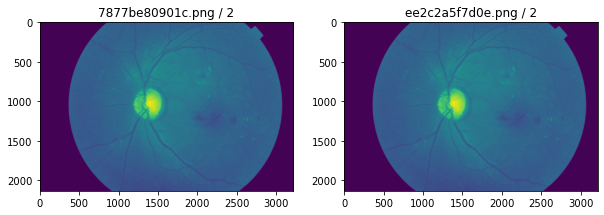

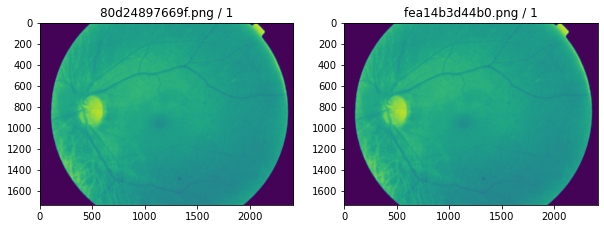

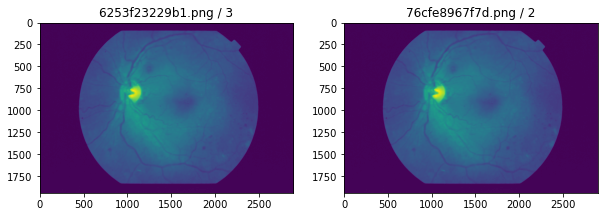

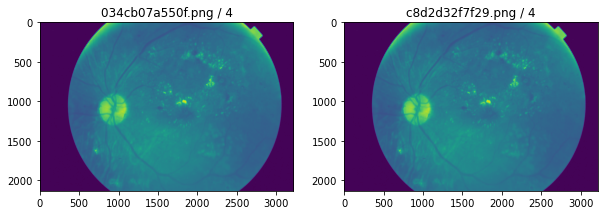

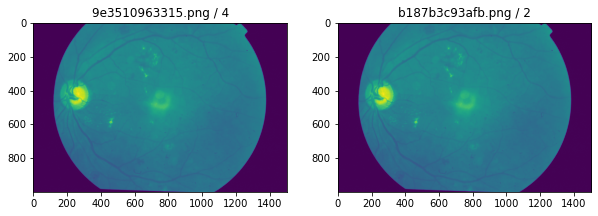

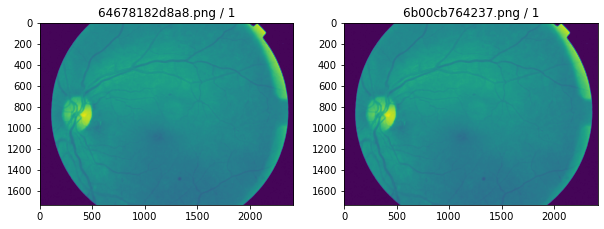

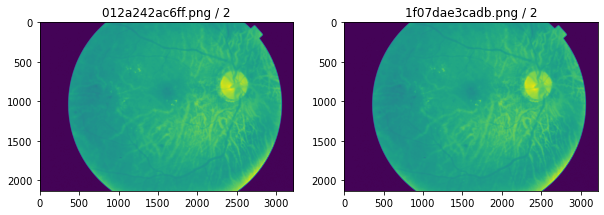

In [37]:
plot_duplicate(df_duplicate2, set_duplicate2[:10], 2)

In [38]:
len(set_duplicate2)

121

## Selection duplicate image

- Same label ==> keep
- Different label ==> remove

In [39]:
list_duplicate = list(df['freq'].unique())
list_duplicate

[1, 2, 3, 4]

In [40]:
for idx_dup in list_duplicate[1:]:
    print(idx_dup)

2
3
4


In [41]:
df['keep'] = ''
df.loc[df['freq'] == 1, ['keep']] = 'yes'

for val_dup in list_duplicate[1:]:
    n_dup = val_dup
    df_dup = df.loc[df['freq'] == val_dup]
    set_dup = list(set(df_dup['dhash']))

    for val_set in set_dup:
        df_set = df_dup.loc[df_dup['dhash'] == val_set]

        if len(df_set['diagnosis'].unique()) == 1:
            df.loc[df_set.index[0], ['keep']] = 'yes'

In [42]:
df.loc[df['freq'] == 4]

,id_code,diagnosis,is_exist,dhash,freq,keep
1730,7a3ea1779b13.png,1,True,2172057777561727016728745938327422032153307929...,4,yes
2407,a8582e346df0.png,1,True,2172057777561727016728745938327422032153307929...,4,
2784,c027e5482e8c.png,1,True,2172057777561727016728745938327422032153307929...,4,
2912,ca6842bfcbc9.png,1,True,2172057777561727016728745938327422032153307929...,4,


In [43]:
df.loc[df['freq'] == 3]

,id_code,diagnosis,is_exist,dhash,freq,keep
431,1e8a1fdee5b9.png,1,True,2475787607378626658835805691391004593318386383...,3,yes
920,42a850acd2ac.png,2,True,1168086357984782599978348579377059719052959852...,3,
1135,4fecf87184e6.png,3,True,1247853630573136263458086393508257496036524868...,3,
1156,51131b48f9d4.png,1,True,1168086357984782599978348579377059719052959852...,3,
1381,60f15dd68d30.png,4,True,2551633009844111481471669657627722769662400867...,3,
1687,772af553b8b7.png,3,True,2551633009844111481471669657627722769662400867...,3,
2003,8cb6b0efaaac.png,2,True,1168086357984782599978348579377059719052959852...,3,
2222,9bf060db8376.png,3,True,1247853630573136263458086393508257496036524868...,3,
2351,a47432cd41e7.png,1,True,2475787607378626658835805691391004593318386383...,3,
2667,b8ebedd382de.png,1,True,2475787607378626658835805691391004593318386383...,3,


In [44]:
df.to_csv(os.path.join(base_dir, 'df_train_dhash.csv'), index=False)